#  Generate random numbers according to Poisson distribution

see exercise 1.33



In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Make your own Poisson generator

In [2]:
# Poisson density function
def pois(k,lam):
    return lam**k * math.exp(-lam) / math.factorial(k)

In [3]:
pois(3,5)

0.14037389581428056

In [4]:
def ran0(seed):
    # starting seed 
    m = 2**31-1
    a = 7**5
    c=0
    while True:
        seed = (a * seed + c) % m
        yield seed/(m+1.)

In [5]:
x = ran0(12345)
print(next(x))

0.09661652846261859


In [6]:
# Make cumulative distribution apoissum
def poiscum(lam, kup, Print=False):
    apois = []
    apoissum = []
    poissum = 0
    if Print: print("    k   apois     apoissum")
    # choose N about 10 sigma above the lam 
    for k in range(kup):
        p = pois(k,lam)
        poissum += p    # sum of all
        apois.append(p) # list of poisson values for each k
        apoissum.append(poissum) # list of cumulative sum
        if Print: print("{:>5.0f}   {:>7.5f}   {:>7.5f}".format(k,p,poissum))
    return apoissum

In [7]:
poiscum(5,15,True)

    k   apois     apoissum
    0   0.00674   0.00674
    1   0.03369   0.04043
    2   0.08422   0.12465
    3   0.14037   0.26503
    4   0.17547   0.44049
    5   0.17547   0.61596
    6   0.14622   0.76218
    7   0.10444   0.86663
    8   0.06528   0.93191
    9   0.03627   0.96817
   10   0.01813   0.98630
   11   0.00824   0.99455
   12   0.00343   0.99798
   13   0.00132   0.99930
   14   0.00047   0.99977


[0.006737946999085467,
 0.040427681994512805,
 0.12465201948308113,
 0.2650259152973617,
 0.4404932850652124,
 0.6159606548330632,
 0.7621834629729387,
 0.8666283259299927,
 0.9319063652781515,
 0.9681719426937953,
 0.9863047314016171,
 0.9945469080869906,
 0.997981148372563,
 0.99930201002086,
 0.9997737463238233]

In [8]:
def find_interval(arr, x):
    """
    In this routine, we use the binary search algorithm 
    to efficiently find the interval where the 
    number x fits in the ordered list.
    """
    low = 0
    high = len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            low = mid + 1
        else:
            high = mid - 1
    return low

In [9]:
# Example usage:
arr = [1, 3, 5, 7, 9, 11, 13]
x = 6.2
interval = find_interval(arr, x)
print(interval)
print(f"The number {x} fits between {arr[interval - 1]} and {arr[interval]}")

3
The number 6.2 fits between 5 and 7


In [10]:
# generate N Poisson random numbers for a given lambda parameter
# kup is the upper limit of k-values
def poisrand(lam, kup, N, seed):
    x = ran0(seed)
    apoissum = poiscum(lam, kup, True)
    aranpois = []
    for i in range(N):
        X = next(x)
        interval = find_interval(apoissum, X) # poiscum(5,15,True)
        #print(i,X, interval)
        aranpois.append(interval)
    return aranpois

In [11]:
arpois = np.array(poisrand(5, 15, 1000, 123456))

    k   apois     apoissum
    0   0.00674   0.00674
    1   0.03369   0.04043
    2   0.08422   0.12465
    3   0.14037   0.26503
    4   0.17547   0.44049
    5   0.17547   0.61596
    6   0.14622   0.76218
    7   0.10444   0.86663
    8   0.06528   0.93191
    9   0.03627   0.96817
   10   0.01813   0.98630
   11   0.00824   0.99455
   12   0.00343   0.99798
   13   0.00132   0.99930
   14   0.00047   0.99977


(array([  7.,  45.,  82., 134., 190., 161., 143., 114.,  61.,  38.,  15.,
          7.,   0.,   3.,   0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15.]),
 <BarContainer object of 15 artists>)

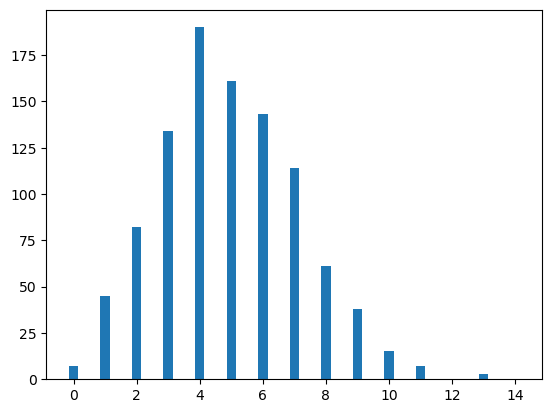

In [18]:
plt.hist(arpois,15,(0,15), rwidth=0.3, align='left')

In [13]:
print("Mean: ",arpois.mean())
print("Std: ",arpois.std())

Mean:  4.928
Std:  2.220093691716636


## Compare to numpy poisson random generator 

In [14]:
# print 10 random numbers
rng = np.random.default_rng(seed=None)
print(rng.poisson(lam=5))
apois = rng.poisson(lam=5, size=10)
apois

4


array([ 4,  4,  6,  3,  6,  5, 12,  2,  5,  8])

(array([  6.,  32.,  82., 136., 171., 163., 170., 106.,  64.,  35.,  18.,
          8.,   7.,   1.,   1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15.]),
 <BarContainer object of 15 artists>)

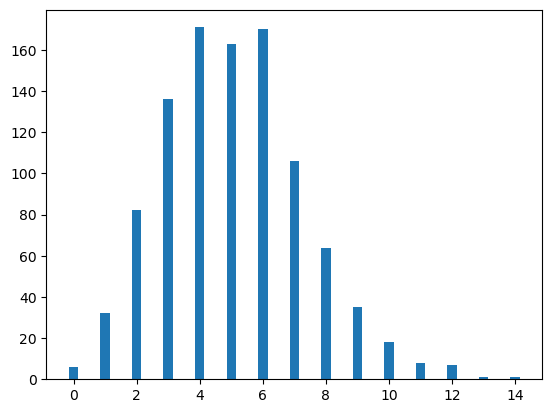

In [19]:
# plot random numbers
apois = rng.poisson(lam=5, size=1000)
plt.hist(apois,15,(0,15), rwidth=0.3, align='left')

In [16]:
print("Mean: ",apois.mean())
print("Std: ",apois.std())

Mean:  4.916
Std:  2.2567551927490936
